In [33]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.models import load_model 
from tensorflow.keras.callbacks import ModelCheckpoint
from  tensorflow.keras.callbacks import EarlyStopping

### do not run the below cell again after splitting the dataset

In [55]:
# Define root directory
root_dir = 'images_mtf'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
 
  try:
    os.mkdir('images_mtf')
    os.mkdir('images_mtf/validation')
    os.mkdir('images_mtf/training')
    os.mkdir('images_mtf/training/focus')
    os.mkdir('images_mtf/training/unfocus')
    #os.mkdir('images_gaf/training/drowsy')
    os.mkdir('images_mtf/validation/focus')
    os.mkdir('images_mtf/validation/unfocus')
    #os.mkdir('images_gaf/validation/drowsy')    
  except OSError:
    pass

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

images_mtf/training
images_mtf/validation
images_mtf/training/unfocus
images_mtf/training/focus
images_mtf/validation/unfocus
images_mtf/validation/focus


In [34]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename +" is zero length, so ignoring.")

    training_length = int(len(files)*SPLIT_SIZE)
    testing_length = int(len(files)-training_length)
    random_set = random.sample(files,len(files))
    training_set = random_set[0:training_length]
    testing_set = random_set[training_length:]

  for filename in training_set:
    curr_file = SOURCE_DIR + filename
    target_dir = TRAINING_DIR + filename
    copyfile(curr_file,target_dir)

  for filename in testing_set:
    curr_file = SOURCE_DIR + filename
    target_dir = VALIDATION_DIR + filename
    copyfile(curr_file,target_dir)
  pass

 

In [35]:
FOCUS_SOURCE_DIR = "dataset_2/focus/"
UNFOCUS_SOURCE_DIR = "dataset_2/unfocus/"
#DROWSY_SOURCE_DIR = "dataset_2/drowsy/"

TRAINING_DIR = 'images_2/training/'
VALIDATION_DIR = 'images_2/validation/'

TRAINING_FOCUS_DIR = os.path.join(TRAINING_DIR, "focus/")
VALIDATION_FOCUS_DIR = os.path.join(VALIDATION_DIR, "focus/")

TRAINING_UNFOCUS_DIR = os.path.join(TRAINING_DIR, "unfocus/")
VALIDATION_UNFOCUS_DIR = os.path.join(VALIDATION_DIR, "unfocus/")

#TRAINING_DROWSY_DIR = os.path.join(TRAINING_DIR, "drowsy/")
#VALIDATION_DROWSY_DIR = os.path.join(VALIDATION_DIR, "drowsy/")


In [6]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_FOCUS_DIR)) > 0:
  for file in os.scandir(TRAINING_FOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_UNFOCUS_DIR)) > 0:
  for file in os.scandir(TRAINING_UNFOCUS_DIR):
    os.remove(file.path)
#if len(os.listdir(TRAINING_DROWSY_DIR)) > 0:
  #for file in os.scandir(TRAINING_DROWSY_DIR):
    #os.remove(file.path)

if len(os.listdir(VALIDATION_FOCUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_UNFOCUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_UNFOCUS_DIR):
    os.remove(file.path)
#if len(os.listdir(VALIDATION_DROWSY_DIR)) > 0:
  #for file in os.scandir(VALIDATION_DROWSY_DIR):
    #os.remove(file.path)

# Define proportion of images used for training
split_size = .7

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(FOCUS_SOURCE_DIR, TRAINING_FOCUS_DIR, VALIDATION_FOCUS_DIR, split_size)
split_data(UNFOCUS_SOURCE_DIR, TRAINING_UNFOCUS_DIR, VALIDATION_UNFOCUS_DIR, split_size)
#split_data(DROWSY_SOURCE_DIR, TRAINING_DROWSY_DIR, VALIDATION_DROWSY_DIR, split_size)
# Check that the number of images matches the expected output



In [36]:
# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original focus's directory has {len(os.listdir(FOCUS_SOURCE_DIR))} images")
print(f"Original unfocus's directory has {len(os.listdir(UNFOCUS_SOURCE_DIR))} images")
#print(f"Original drowsy's directory has {len(os.listdir(DROWSY_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_FOCUS_DIR))} images of focus for training")
print(f"There are {len(os.listdir(TRAINING_UNFOCUS_DIR))} images of unfocus for training")
#print(f"There are {len(os.listdir(TRAINING_DROWSY_DIR))} images of drowsy for training\n")

print(f"There are {len(os.listdir(VALIDATION_FOCUS_DIR))} images of focus for validation")
print(f"There are {len(os.listdir(VALIDATION_UNFOCUS_DIR))} images of unfocus for validation")
#print(f"There are {len(os.listdir(VALIDATION_DROWSY_DIR))} images of drowsy for validation")

Original focus's directory has 12870 images
Original unfocus's directory has 12870 images
There are 9009 images of focus for training
There are 9009 images of unfocus for training
There are 3861 images of focus for validation
There are 3861 images of unfocus for validation


In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    # Block 1
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Block 3
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and fully-connected layers
    Flatten(),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Original output layer for 1000 classes
])


In [60]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.3),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 64)       

In [38]:
import cv2

# Provide the path to your image here
image_path = "dataset/drowsy/eeg_record33_plot567.png"  # Replace with your actual image path

# Read the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was read successfully
if image is not None:
    # Get the image dimensions (width, height)
    width = image.shape[1]
    height = image.shape[0]

    # Print the image size
    print("Image size:", width, "x", height, "pixels")
else:
    print("Error: Could not read the image.")


Image size: 600 x 600 pixels


In [45]:
from tensorflow.keras.optimizers.legacy import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [46]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary', #categorical
                                                      target_size=(224, 224)
                                                      )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary', # categorical
                                                                target_size=(224, 224)
                                                                )
  ### END CODE HERE
  return train_generator, validation_generator

In [47]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 18018 images belonging to 2 classes.
Found 7722 images belonging to 2 classes.


In [48]:
checkpoint = ModelCheckpoint('vgg16_arch_best_weights.keras',
                             monitor='val_accuracy',
                            #  monitor='val_f1_score',
                             verbose=1,
                             mode='max',
                             save_best_only=True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      restore_best_weights=True,
                      patience=50)

callbacks_list = [checkpoint,early]

In [ ]:
with tf.device('/GPU:0'):    
    history = model.fit(
        train_generator,
        epochs=150,
        validation_data=validation_generator,
        callbacks=[callbacks_list],
        verbose=2,
        shuffle=False)

In [ ]:
# Train the model
with tf.device('/GPU:0'):
    history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 40,
            validation_steps = 50,
            verbose = 2)

150 x 150 
epochs - 150
dropout - 0.3
shuffling - False
mtf dataset

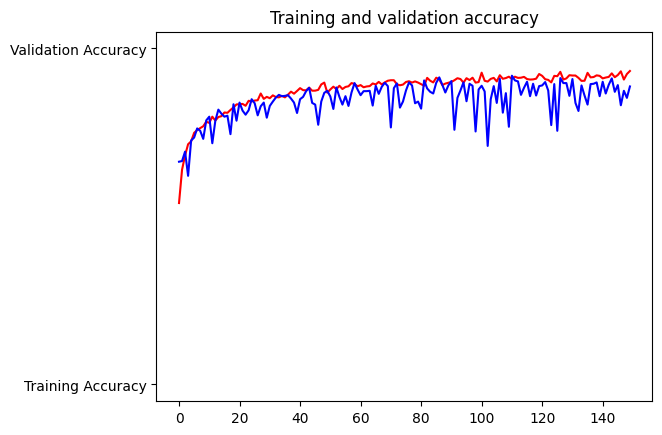

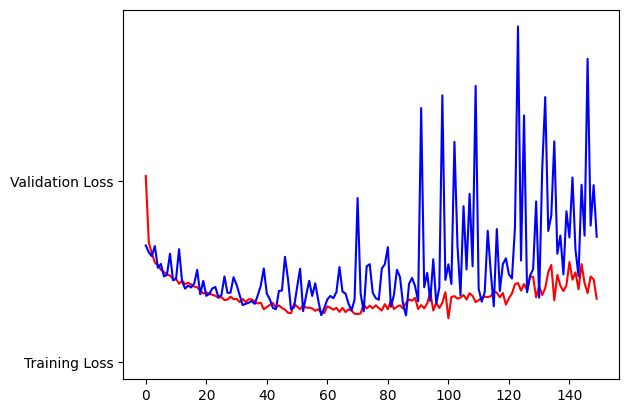

In [67]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [68]:
model.save("models/model_binary_150_150ep_0.7split_mtf.keras") 


In [14]:
from tensorflow.keras.optimizers.legacy import RMSprop

load_model = tf.keras.models.load_model('models/model_binary_150_150ep_0.7split.keras')

load_model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
result = load_model.evaluate(validation_generator)
dict(zip(load_model.metrics_names, result))

2024-01-30 18:52:00.253378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


387/387 [==============================] - 69s 178ms/step - loss: 0.7942 - accuracy: 0.5000


{'loss': 0.7941829562187195, 'accuracy': 0.5}

## Transfer learning

In [13]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

--2024-01-24 14:43:16--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.155, 142.250.77.123, 142.250.182.155, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   358KB/s    in 3m 41s  

2024-01-24 14:46:57 (389 KB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [14]:
# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [15]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [16]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
#x = layers.Dense(3, activation='softmax')(x)
# Append the dense network to the base model
model2 = Model(pre_trained_model.input, x) 



In [17]:
# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_3[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [18]:
# Set the training parameters
model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model.
history = model2.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2)

Epoch 1/100
100/100 - 24s - loss: 3.6602 - accuracy: 0.5285 - val_loss: 2.5111 - val_accuracy: 0.4910 - 24s/epoch - 240ms/step
Epoch 2/100
100/100 - 22s - loss: 1.6365 - accuracy: 0.5497 - val_loss: 2.4985 - val_accuracy: 0.4860 - 22s/epoch - 218ms/step
Epoch 3/100
100/100 - 21s - loss: 1.4257 - accuracy: 0.5770 - val_loss: 0.8710 - val_accuracy: 0.6030 - 21s/epoch - 211ms/step
Epoch 4/100
100/100 - 21s - loss: 1.4069 - accuracy: 0.5480 - val_loss: 0.9257 - val_accuracy: 0.5750 - 21s/epoch - 211ms/step
Epoch 5/100
100/100 - 21s - loss: 1.5771 - accuracy: 0.5525 - val_loss: 0.7441 - val_accuracy: 0.6590 - 21s/epoch - 213ms/step
Epoch 6/100
100/100 - 21s - loss: 1.5325 - accuracy: 0.5465 - val_loss: 2.9073 - val_accuracy: 0.5010 - 21s/epoch - 214ms/step
Epoch 7/100
100/100 - 21s - loss: 1.5445 - accuracy: 0.5345 - val_loss: 1.8783 - val_accuracy: 0.5120 - 21s/epoch - 212ms/step
Epoch 8/100
100/100 - 21s - loss: 1.5535 - accuracy: 0.5390 - val_loss: 2.2362 - val_accuracy: 0.5000 - 21s/epo

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()